In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Missing data
Missing data occurs when values are simply absent or contain NaN (Not a Number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization
- Arithmetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove rows or columns containing missing data
- Impute with mean or median (usually done with numerics)
- Impute with mode (most frequently occuring feature/value, for categoricals)
- Impute with forward or backward fill (the next/previous value)
- Interpolate data between two points (4,6,8,4,-,-,12) -> (4,6,8,7,9,12) [Two missing evenly spaced between 4 and 12]

*Note: Domain knowledge is often needed to decide how to fill nulls.*

In [6]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])
df = df[ df > 0 ]
df

,A,B,C,D
0,0.803679,NaN,NaN,NaN
1,0.313020,NaN,0.899870,NaN
2,NaN,0.119065,1.155769,0.687792
3,1.223398,NaN,0.117870,1.003797
4,2.539914,1.919592,2.029770,NaN
5,1.035417,0.104521,0.242724,NaN
6,1.587404,NaN,NaN,0.906155
7,0.827874,0.098375,NaN,NaN
8,1.001635,1.712009,NaN,NaN
9,0.164664,NaN,0.323830,1.256903


In [9]:
# Let's day column D has many missing values. We decide to drop the entire column.df

copy = df.copy()
copy.drop(columns="D", inplace=True) 

## Dropna
Remove rows (default) or columns containing null.

**Parameters**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to *not* drop
- **subset** = only look for NaN in subset of columns (or rows)
- **axis** = "index" (default), or "columns"

In [19]:
# Let's say column C only has a few missing values. Then we can only drop those few.
# na is Pandas termononoly, None is Python, NaN is numpy.

# Returns a boolean mask 
copy.isna()

# Drops all rows containing NaN
copy.dropna(how="all")

# Drops all rows containing less than 2 not NaN
copy.dropna(thresh=2)

# Only look for NaN in subset of columns (or rows)
copy.dropna(subset=["A","C"])

# Drop columns instead of rows, where there are less than 6 non-NaN values
copy.dropna(axis="columns", thresh=6)

,A,C
0,0.803679,NaN
1,0.313020,0.899870
2,NaN,1.155769
3,1.223398,0.117870
4,2.539914,2.029770
5,1.035417,0.242724
6,1.587404,NaN
7,0.827874,NaN
8,1.001635,NaN
9,0.164664,0.323830


### fillna
Fill missing values.

In [33]:
copy = df.copy()

# You can also set to a string. Common is to set it to 0, or median value of column
copy["A"].mean()

copy["A"].fillna(copy["A"].mean(), inplace=True)

# To fill, mainly for categorical data. Returns a list of the most prevalent values.
copy["B"].mode()

copy["B"].ffill(inplace=True)
copy["D"].bfill(inplace=True)
copy["C"].interpolate(inplace=True)
copy

,A,B,C,D
0,0.803679,NaN,NaN,0.687792
1,0.313020,NaN,0.899870,0.687792
2,1.055223,0.119065,1.155769,0.687792
3,1.223398,0.119065,0.117870,1.003797
4,2.539914,1.919592,2.029770,0.906155
5,1.035417,0.104521,0.242724,0.906155
6,1.587404,0.104521,0.263001,0.906155
7,0.827874,0.098375,0.283277,1.256903
8,1.001635,1.712009,0.303554,1.256903
9,0.164664,1.712009,0.323830,1.256903


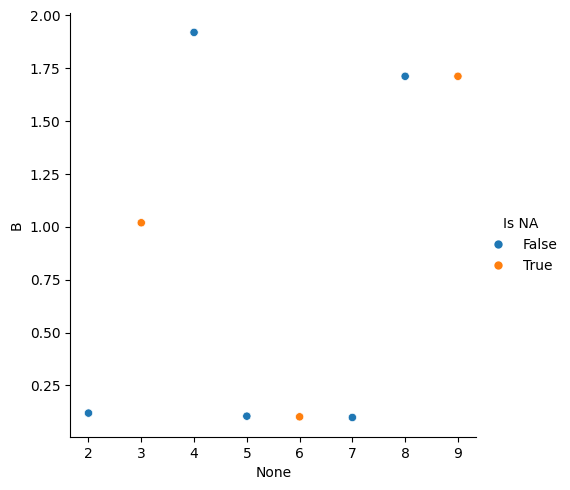

In [42]:
copy = df.copy()
copy["Is NA"] = copy["B"].isna()
copy["B"].interpolate(inplace=True)
sns.relplot(x=copy.index, y="B", hue="Is NA", data=copy)